In [1]:
from pandas import Series,DataFrame
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
import statistics

In [2]:
import random
from random import randint

# data_prepration_part

In [3]:
def mat_crt():
    b=[]
    for i in np.arange(0,9,1):
        a=random.randint(-100,100)
        b=np.append(b,a)
    b=b.reshape(3,3)
    d=DataFrame(b)
    return(d)

In [4]:
def rel(m,indx,r,c):
    a1=m.T[indx].values.reshape(3,3)
    a11=(np.append((a1.T[c-1]),(a1[r-1])))
    return(a11)

In [111]:
no=10000
t1=[]
t2=[]
for i in np.arange(no):
    m=mat_crt()
    m1=m.dot(m)
    t1=np.append(t1,m.values)
    t2=np.append(t2,m1.values)

In [73]:
t11=DataFrame(t1.reshape(no,9))
t21=DataFrame(t2.reshape(no,9))

In [75]:
rel(t11,0,1,1)
#m0=t11.T[0].values.reshape(3,3)

array([-73., -23.,  44., -73., -51.,  80.])

In [76]:
y=[]
x=[]
for i in np.arange(1,len(t11[0]),1):
    for j in np.arange(1,len(t11.T[0]),1):
        y=np.append(y,t21[j][i])
        if j<=2:
            a1=1
            x=np.append(x,rel(t11,i,a1,j+1))
        if j>=3 and j<6:
            a1=2
            a2=abs(2-j)
            x=np.append(x,rel(t11,i,a1,a2))
        if j>=6:
            a1=3
            a2=abs(5-j)
            x=np.append(x,rel(t11,i,a1,a2))

In [77]:
x_df=DataFrame(Series(x).values.reshape(8*(no-1),6),columns=["x1","x2","x3","x4","x5","x6"])

In [78]:
x_df["y"]=y

In [79]:
#(13*-29)+(-66*13)+(96*20)

In [82]:
x_df.tail()

,x1,x2,x3,x4,x5,x6,y
79987,17.0,41.0,-57.0,-66.0,41.0,73.0,-3602.0
79988,45.0,73.0,-53.0,-66.0,41.0,73.0,-3846.0
79989,-17.0,-66.0,-5.0,-5.0,-57.0,-53.0,4112.0
79990,17.0,41.0,-57.0,-5.0,-57.0,-53.0,599.0
79991,45.0,73.0,-53.0,-5.0,-57.0,-53.0,-1577.0


In [83]:
x=x_df[["x1","x2","x3","x4","x5","x6"]].values
y=x_df["y"]

# ML part

In [84]:
from sklearn.preprocessing import StandardScaler,Normalizer

In [85]:
from sklearn.linear_model import LinearRegression,LogisticRegression
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,mean_squared_error

In [86]:
#x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [87]:
model_le=LinearRegression()
model_xg=xgb.XGBRegressor(base_score=0.5, booster='dart', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0.25,
       importance_type='gain', learning_rate=0.8, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [88]:
model_xg.fit(x,y)

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[17:51:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='dart', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0.25,
       importance_type='gain', learning_rate=0.8, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [89]:
y_pre=model_xg.predict(x)

In [90]:
df_pre=DataFrame([y_pre,y],index=["predicted","observed"]).T

In [91]:
mean_squared_error(df_pre["predicted"].values,df_pre["observed"])

526717.1449092393

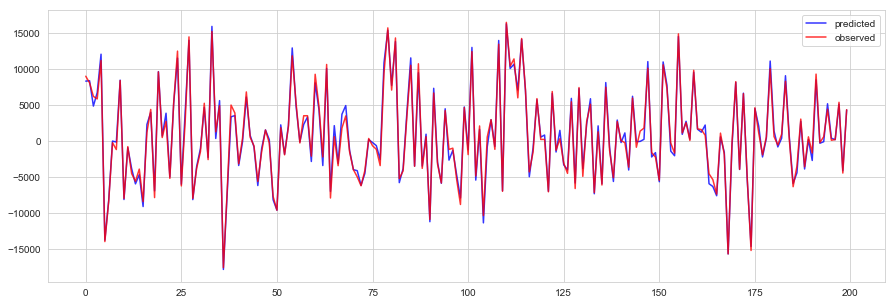

In [114]:
df_pre["predicted"][0:200].plot(figsize=(15,5),color="blue",alpha=.8)
df_pre["observed"][0:200].plot(figsize=(15,5),color="red",alpha=.8)
plt.legend(["predicted","observed"])

In [112]:
df_pre.head(10)

,predicted,observed
0,8287.832031,8968.0
1,8337.431641,8048.0
2,4815.100098,6166.0
3,6701.497559,5812.0
4,12032.703125,11159.0
5,-13832.468750,-14030.0
6,-8294.093750,-8470.0
7,-48.796021,-277.0
8,-186.488663,-1229.0
9,8422.132812,8362.0


In [25]:
def numriser(arr):
    arr1=[]
    for i in arr:
        arr1=np.append(arr1,int(i))
    return(arr1)

In [94]:
#now proceeding forward to predict the matrix_multiplication for sa given matrix and thus varifying it

In [95]:
a=[]
for i in np.arange(9):
    a=np.append(a,random.randint(1,100))

In [96]:
a.reshape(3,3)

array([[89., 32., 67.],
       [67., 54., 11.],
       [20., 61.,  2.]])

In [98]:
tm1=DataFrame(a).T
tm1

,0,1,2,3,4,5,6,7,8
0,89.0,32.0,67.0,67.0,54.0,11.0,20.0,61.0,2.0


In [99]:
rel(tm1,0,1,1)

array([89., 67., 20., 89., 32., 67.])

In [100]:
b=[]
for i in np.arange(1,4,1):
    for j in np.arange(1,4,1):
        b=np.append(b,rel(tm1,0,j,i))

In [101]:
df_b=DataFrame(Series(b).values.reshape(9,6),columns=["x1","x2","x3","x4","x5","x6"])

In [102]:
a.reshape(3,3)

array([[89., 32., 67.],
       [67., 54., 11.],
       [20., 61.,  2.]])

In [103]:
df_b

,x1,x2,x3,x4,x5,x6
0,89.0,67.0,20.0,89.0,32.0,67.0
1,89.0,67.0,20.0,67.0,54.0,11.0
2,89.0,67.0,20.0,20.0,61.0,2.0
3,32.0,54.0,61.0,89.0,32.0,67.0
4,32.0,54.0,61.0,67.0,54.0,11.0
5,32.0,54.0,61.0,20.0,61.0,2.0
6,67.0,11.0,2.0,89.0,32.0,67.0
7,67.0,11.0,2.0,67.0,54.0,11.0
8,67.0,11.0,2.0,20.0,61.0,2.0


In [104]:
y_pre1=model_xg.predict(df_b.values)

In [105]:
y_pre1

array([11082.78  ,  9406.351 ,  6092.91  ,  9177.001 ,  5972.605 ,
        4033.9883,  7052.1406,  5179.712 ,  2370.3582], dtype=float32)

In [106]:
mat=a.reshape(3,3)

In [107]:
mat1=mat.dot(mat)

In [108]:
mat1                #expected matrix

array([[11405.,  8663.,  6449.],
       [ 9801.,  5731.,  5105.],
       [ 5907.,  4056.,  2015.]])

In [109]:
y_pre1.reshape(3,3)         #predicted matrix

array([[11082.78  ,  9406.351 ,  6092.91  ],
       [ 9177.001 ,  5972.605 ,  4033.9883],
       [ 7052.1406,  5179.712 ,  2370.3582]], dtype=float32)